<a href="https://colab.research.google.com/github/mint-aguccim/Machine_Learning_Programming/blob/main/4%EC%A3%BC%EC%B0%A8/Deeplearning_wine_quality_white_upload.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import pandas as pd
import numpy as np
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# -----------------------------
# 1) 데이터 준비
# -----------------------------

df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/winequality-white.csv", sep=";")
df  # print(df) 와 동일

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [17]:
X = df.drop("quality", axis=1)
y = df["quality"]

In [18]:
# 타겟 단순화 (6 이상이면 "좋은 와인(1)", 아니면 "나쁜 와인(0)")
y = (y >= 6).astype(int)

Text(0.5, 1.0, 'Label')

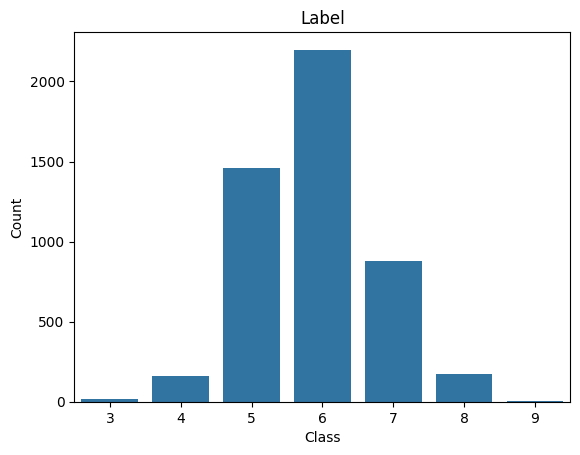

In [19]:
# 레이블 갯수 확인 (그래프)

import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data = df, x="quality")
plt.xlabel("Class")        # 그래프 x 축 이름
plt.ylabel("Count")        # 그래프 y 축 이름
plt.title("Label")

In [20]:
# 결측치 제거
df = df.dropna()
df.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


In [21]:
# 결측치 확인
df.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


In [22]:
df.columns  # 컬럼명 확인

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [24]:
# -----------------------------
# 2) 데이터 정규화
# -----------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [25]:
# -----------------------------
# 3) y one-hot 인코딩
# -----------------------------
Y = pd.get_dummies(y).values

In [28]:
# -----------------------------
# 5) 딥러닝 모델 정의
# -----------------------------
model = models.Sequential([
    layers.Dense(64, activation="relu", input_shape=(X_train.shape[1],)),
    layers.Dropout(0.3),
    layers.Dense(32, activation="relu"),
    layers.Dense(Y.shape[1], activation="softmax")  # 클래스 수 맞춤
])

In [29]:
# -----------------------------
# 6) 모델 컴파일
# -----------------------------
model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

In [30]:
# -----------------------------
# 7) 모델 학습
# -----------------------------
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=16,
    verbose=1
)

Epoch 1/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6254 - loss: 0.6303 - val_accuracy: 0.7628 - val_loss: 0.5169
Epoch 2/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7562 - loss: 0.5075 - val_accuracy: 0.7474 - val_loss: 0.5041
Epoch 3/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7634 - loss: 0.4940 - val_accuracy: 0.7526 - val_loss: 0.4913
Epoch 4/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7558 - loss: 0.4971 - val_accuracy: 0.7500 - val_loss: 0.4899
Epoch 5/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7821 - loss: 0.4745 - val_accuracy: 0.7564 - val_loss: 0.4838
Epoch 6/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7840 - loss: 0.4623 - val_accuracy: 0.7551 - val_loss: 0.4826
Epoch 7/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7659 - loss: 0.4743 - val_accuracy: 0.7462 - val_loss: 0.4806
Epoch 8/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7902 - loss: 0.4631 - val_accuracy: 0.

In [31]:
# -----------------------------
# 8) 테스트 데이터 예측
# -----------------------------
y_pred = model.predict(X_test)
y_test_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_pred, axis=1)

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


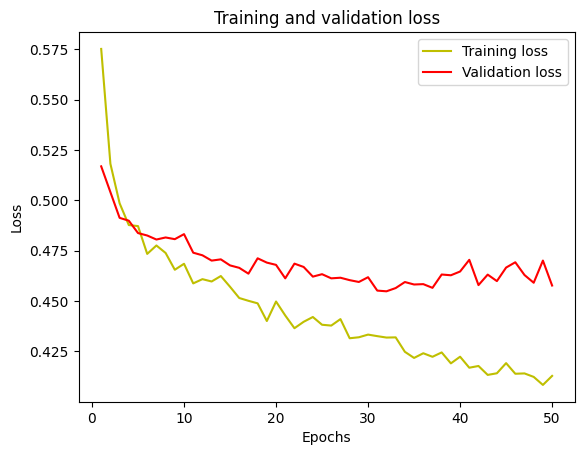

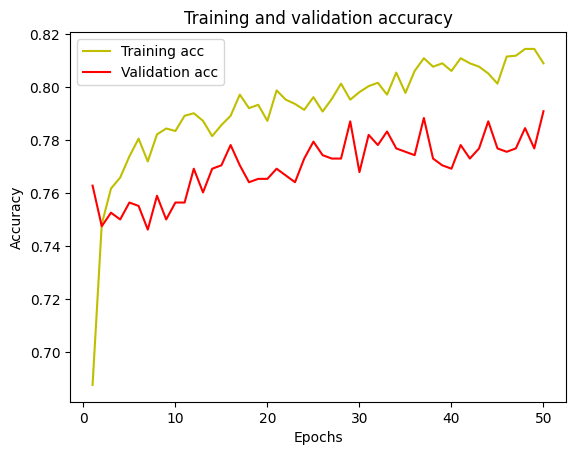

In [32]:
# -----------------------------
# 10) 학습 곡선 시각화
# -----------------------------
epochs = range(1, len(history.history['loss']) + 1)

plt.plot(epochs, history.history['loss'], 'y', label='Training loss')
plt.plot(epochs, history.history['val_loss'], 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(epochs, history.history['accuracy'], 'y', label='Training acc')
plt.plot(epochs, history.history['val_accuracy'], 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [33]:
# -----------------------------
# 11) 성능 평가
# -----------------------------
print("Classification Report:\n", classification_report(y_test_class, y_pred_class))
print("Confusion Matrix:\n", confusion_matrix(y_test_class, y_pred_class))

Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.60      0.66       355
           1       0.79      0.87      0.83       625

    accuracy                           0.77       980
   macro avg       0.76      0.73      0.74       980
weighted avg       0.77      0.77      0.77       980

Confusion Matrix:
 [[213 142]
 [ 82 543]]


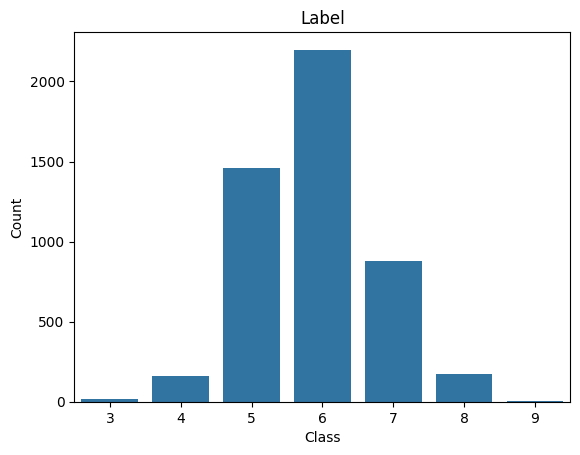

=== Logistic Regression Test Results ===
Accuracy: 0.7408163265306122
Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.48      0.56       328
           1       0.77      0.87      0.82       652

    accuracy                           0.74       980
   macro avg       0.71      0.68      0.69       980
weighted avg       0.73      0.74      0.73       980

기울기 (coef): [[-0.02062872 -0.64989607 -0.00237907  0.79910857  0.0047932   0.19060241
  -0.05958488 -0.68242054  0.1134096   0.19958335  0.99220347]]
절편 (intercept): [0.92767439]
--------------------------------------------------
=== KNN Test Results ===
Accuracy: 0.7571428571428571
Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.58      0.61       328
           1       0.80      0.85      0.82       652

    accuracy                           0.76       980
   macro avg       0.73      0.71      0.72       980

In [41]:
# 0) 다시
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# -----------------------------
# 1) 데이터 준비
# -----------------------------
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/winequality-white.csv", sep=";")

X = df.drop("quality", axis=1)
y = df["quality"]

# 타겟 단순화 (6 이상이면 "좋은 와인(1)", 아니면 "나쁜 와인(0)")
y = (y >= 6).astype(int)

# 레이블 갯수 확인 (그래프)
sns.countplot(data=df, x="quality")
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Label")
plt.show()

# 결측치 확인 및 제거
df = df.dropna()

# 컬럼명 확인
df.columns

# -----------------------------
# 2) 데이터 분할 & 정규화
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# StandardScaler 적용 (모든 모델 공통)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# -----------------------------
# 3) 모델 정의
# -----------------------------
models = {
    "Logistic Regression": LogisticRegression(max_iter=500, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}

# -----------------------------
# 4) 학습 & 평가 (모든 모델에 스케일링 데이터 사용)
# -----------------------------
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    print(f"=== {name} Test Results ===")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))

    if name == "Logistic Regression":
        print("기울기 (coef):", model.coef_)
        print("절편 (intercept):", model.intercept_)

    print("-" * 50)

# -----------------------------
# NOTE:
# 이 상태에서 뒤에 딥러닝 코드를 붙이면 변수 충돌 없이 바로 실행 가능
# X_train_scaled, X_test_scaled, y 변수 그대로 사용
# 딥러닝에서는 y를 one-hot으로 변환하면 됨


Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


196/196 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.6578 - loss: 0.6148 - val_accuracy: 0.7730 - val_loss: 0.4930
Epoch 2/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7780 - loss: 0.4872 - val_accuracy: 0.7577 - val_loss: 0.4884
Epoch 3/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7746 - loss: 0.4890 - val_accuracy: 0.7602 - val_loss: 0.4840
Epoch 4/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7683 - loss: 0.4823 - val_accuracy: 0.7653 - val_loss: 0.4830
Epoch 5/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7581 - loss: 0.5011 - val_accuracy: 0.7679 - val_loss: 0.4745
Epoch 6/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7680 - loss: 0.4739 - val_accuracy: 0.7704 - val_loss: 0.4790
Epoch 7/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7883 - loss: 0.4750 - val_accuracy: 0.7704 - val_loss: 0.4778
Epoch 8/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7901 - loss: 0.4685 - val_accuracy: 0.7653 - val

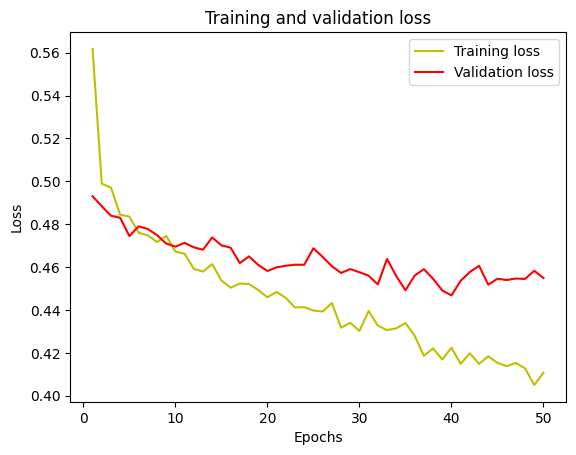

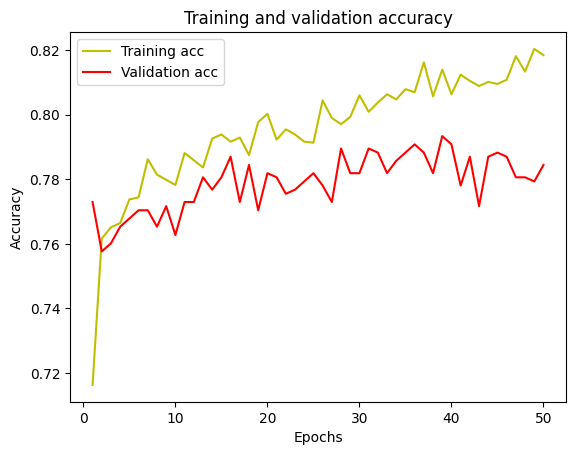

              precision    recall  f1-score   support

           0       0.71      0.66      0.68       355
           1       0.81      0.85      0.83       625

    accuracy                           0.78       980
   macro avg       0.76      0.75      0.76       980
weighted avg       0.77      0.78      0.78       980

[[233 122]
 [ 96 529]]


In [42]:
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import layers, models
import numpy as np
from sklearn.model_selection import train_test_split

# 1) 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # 이미 NumPy 배열

# 2) y one-hot
Y = pd.get_dummies(y).values

# 3) 학습/테스트 분리
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, Y, test_size=0.2, random_state=0
)
model = models.Sequential([
    layers.Dense(64, activation="relu", input_shape=(X.shape[1],)),
    layers.Dropout(0.3),
    layers.Dense(32, activation="relu"),
    layers.Dense(Y.shape[1], activation="softmax")   # 클래스 수 맞춤
])

model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",   # one-hot이면 categorical_crossentropy
    metrics=["accuracy"]
)

history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=16,
    verbose=1
)

y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_pred, axis=1)

# 학습 곡선
loss = history.history['loss']
val_loss = history.history['val_loss']  # <- 여기 수정
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))